In [263]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import scipy as sp

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [264]:
df_train = pd.read_csv('Item Sale Price Prediction/Train.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [265]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [266]:
df_train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


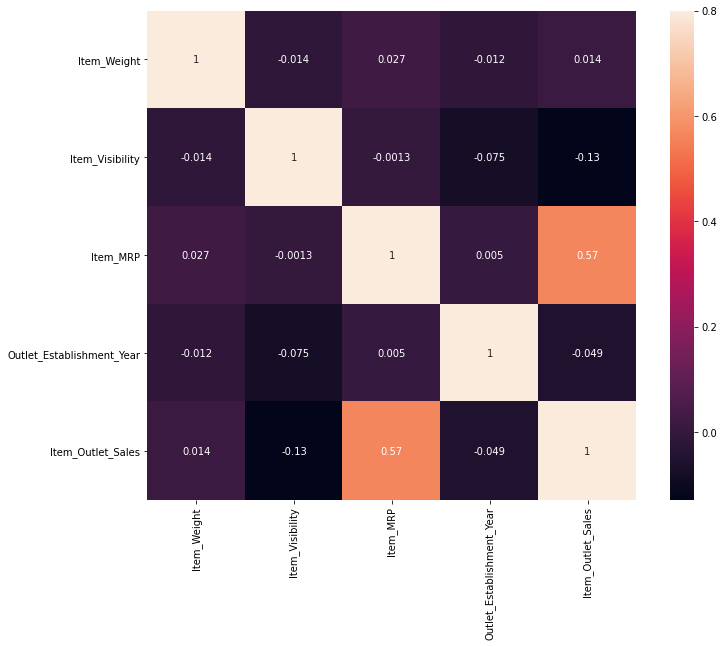

In [267]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

In [268]:
df_train['Item_Weight'] = df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [269]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [270]:
df_train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


Dropping the ID columns


In [271]:
df_train.drop(['Item_Identifier','Outlet_Identifier'], inplace =True, axis=1)
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [272]:
df_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [273]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg','Regular')
df_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [274]:
df_train.describe(include='O')

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,6113,8523,8523
unique,2,16,3,3,4
top,Low Fat,Fruits and Vegetables,Medium,Tier 3,Supermarket Type1
freq,5517,1232,2793,3350,5577


<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

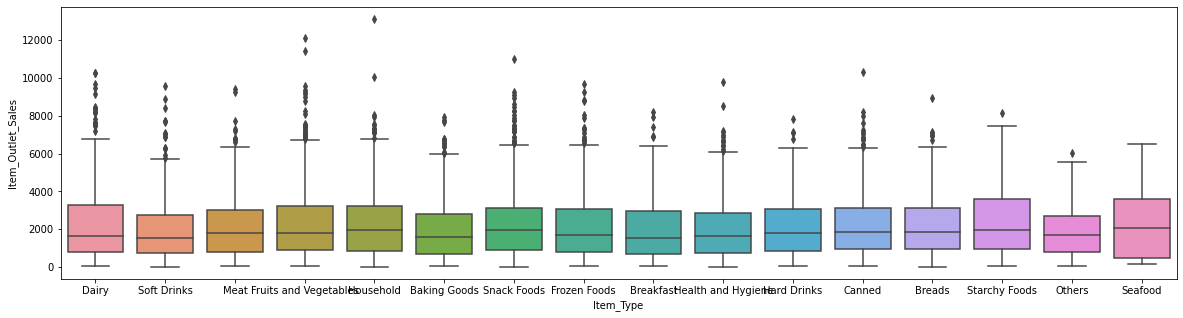

In [275]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df_train['Item_Type'], y=df_train['Item_Outlet_Sales'])

In [276]:
df_train.drop('Item_Type',inplace=True,axis=1)


In [277]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

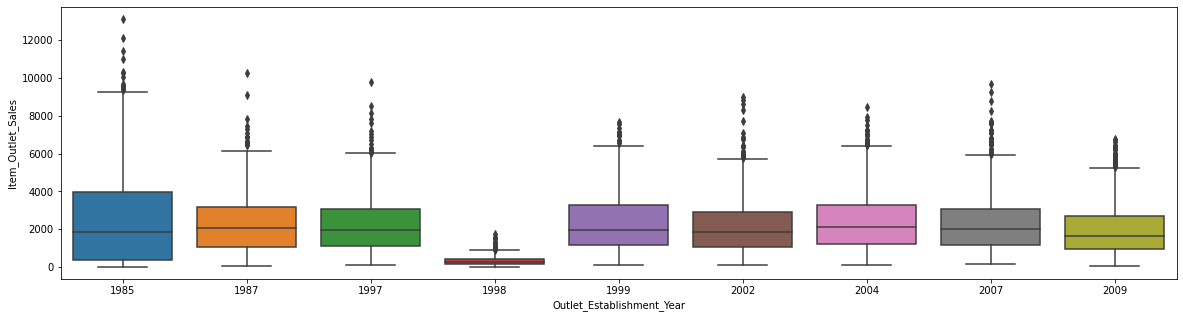

In [278]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df_train['Outlet_Establishment_Year'], y=df_train['Item_Outlet_Sales'])

In [279]:
df_train.drop('Outlet_Establishment_Year',inplace=True,axis=1)

In [280]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [281]:
df_train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [282]:
fill = ['High','Medium','Small']
df_train['Outlet_Size'] = df_train['Outlet_Size'].fillna(pd.Series(np.random.choice(fill,size=len(df_train.index))))

In [283]:
df_train['Outlet_Size'].describe()

count       8523
unique         3
top       Medium
freq        3585
Name: Outlet_Size, dtype: object

In [284]:
ifc_mapping = {'Low Fat' : 0 , 'Regular' : 1}
os_mapping = {'High' : 0, 'Medium' : 1, 'Small' : 2}
olt_mapping = {'Tier 1' : 0, 'Tier 2' : 1, 'Tier 3' : 2}
ot_mapping = {'Supermarket Type1' : 0 , 'Supermarket Type2' : 1, 'Supermarket Type3' : 2, 'Grocery Store' : 3}
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(ifc_mapping)
df_train['Outlet_Size'] = df_train['Outlet_Size'].replace(os_mapping)
df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].replace(olt_mapping)
df_train['Outlet_Type'] = df_train['Outlet_Type'].replace(ot_mapping)

In [285]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,249.8092,1,0,0,3735.1380
1,5.92,1,0.019278,48.2692,1,2,1,443.4228
2,17.50,0,0.016760,141.6180,1,0,0,2097.2700
3,19.20,1,0.000000,182.0950,2,2,3,732.3800
4,8.93,0,0.000000,53.8614,0,2,0,994.7052


In [286]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [303]:
x = df_train.filter(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
y = df_train['Item_Outlet_Sales']

In [304]:
model1 = LinearRegression()
model1.fit(x,y)
rsq1 = model1.score(x, y)
rsq1

0.3953294749377567

In [305]:
model2 = RandomForestRegressor(n_estimators=10, random_state=0)
model2.fit(x,y)
rsq3 = model2.score(x , y)
rsq3

0.9146629278422926

Random forest better regression algorithm

In [306]:
df_test = pd.read_csv('Item Sale Price Prediction\Test.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [307]:
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [308]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [309]:
fill = ['High','Medium','Small']
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(pd.Series(np.random.choice(fill,size=len(df_train.index))))

In [310]:
df_test.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,5681,5681,5681
unique,1543,5,16,10,3,3,4
top,FDN52,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,2399,2233,3717


In [311]:
df_test.drop(['Outlet_Identifier','Item_Type','Outlet_Establishment_Year'], inplace =True, axis=1)
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,87.3198,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,241.7538,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,155.0340,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3


In [312]:
df_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [313]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg','Regular')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,241.7538,Small,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3


In [314]:
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(ifc_mapping)
df_test['Outlet_Size'] = df_test['Outlet_Size'].replace(os_mapping)
df_test['Outlet_Location_Type'] = df_test['Outlet_Location_Type'].replace(olt_mapping)
df_test['Outlet_Type'] = df_test['Outlet_Type'].replace(ot_mapping)

In [315]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,107.8622,1,0,0
1,FDW14,8.300000,1,0.038428,87.3198,2,1,0
2,NCN55,14.600000,0,0.099575,241.7538,1,2,3
3,FDQ58,7.315000,0,0.015388,155.0340,1,1,0
4,FDY38,12.695633,1,0.118599,234.2300,1,2,2


In [316]:
x_new = df_test.filter(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP','Outlet_Size', 'Outlet_Location_Type','Outlet_Type'])
y_new = model2.predict(x_new)
y_new

array([1676.01834, 1805.44986,  672.85748, ..., 2049.59872, 3938.8728 ,
       1159.75702])

In [317]:
df = pd.DataFrame(y_new)
df.columns = ['SalesPrediction']
df = df.set_index(df_test['Item_Identifier'])
df

,SalesPrediction
Item_Identifier,
FDW58,1676.01834
FDW14,1805.44986
NCN55,672.85748
FDQ58,2330.83264
FDY38,5380.72928
...,...
FDB58,2430.50290
FDD47,2227.76680
NCO17,2049.59872
